In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

# plot decsion regions
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):
    # setup marker generator and color map
    markers = ('o', 'x', 's', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() -1, X[:, 0].max() +1
    x2_min, x2_max = X[:, 1].min() -1, X[:, 1].max() +1

    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))

    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx2.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y==cl, 0], y=X[y==cl, 1], alpha=0.8, c=[colors[idx]], marker=markers[idx], label=cl)

df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data', header=None)
X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, stratify=y, random_state=0)

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

X_train_std.shape

(124, 13)

In [3]:
mean_vecs = []
for label in range(1, 4):
    mean_vecs.append(np.mean(X_train_std[y_train==label], axis=0))
mean_vecs

[array([ 0.9065826 , -0.34973457,  0.32010329, -0.71891449,  0.50558678,
         0.88069702,  0.95894709, -0.55161049,  0.54159322,  0.23383109,
         0.58971299,  0.65631399,  1.20749382]),
 array([-0.87487963, -0.28480003, -0.37347228,  0.31571225, -0.38480347,
        -0.04332505,  0.06345321, -0.09460613,  0.07034749, -0.82860474,
         0.31436962,  0.36084258, -0.72528643]),
 array([ 0.199215  ,  0.8660339 ,  0.168163  ,  0.41484489, -0.04511771,
        -1.02855532, -1.28756034,  0.82867687, -0.77947565,  0.96494432,
        -1.20899133, -1.36215159, -0.40130076])]

In [7]:
S_W = np.cov(X_train_std.T)

In [8]:
...

Ellipsis

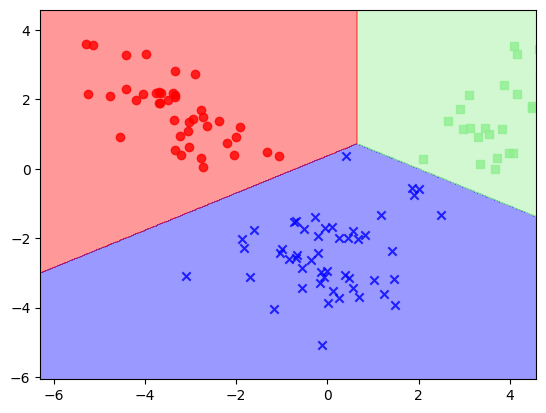

1.0


In [17]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components=2)
X_train_lda = lda.fit_transform(X_train_std, y_train)

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=1)
lr = lr.fit(X_train_lda, y_train)

plot_decision_regions(X_train_lda, y_train, classifier=lr)
plt.show()

print(lr.score(X_train_lda, y_train))